## Imports

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Results

In [2]:
def fetch_results(path, model, method):
    table = pd.read_csv(path)
    table['Model'] = model
    table['Method'] = method
    return table

In [3]:
gpt4_ft_semantic = fetch_results("DATA/gpt_4_turbo_w_break_full_table_20240928-102819/scores_embed_100.csv", "GPT4-Turbo", "Full Table")
gpt4_rbr_semantic = fetch_results("DATA/gpt_4_turbo_w_break_generic_keys_rows_20240928-130728/scores_embed_100.csv", "GPT4-Turbo", "Row-by-Row")
gpt4_cbc_semantic = fetch_results("DATA/gpt_4_turbo_w_break_generic_keys_cells_20240928-205138/scores_embed_100.csv", "GPT4-Turbo", "Cell-by-Cell")
gpt4o_ft_semantic = fetch_results("DATA/gpt_4o_full_table_20240727-211636/scores_embed_100.csv", "GPT-4o", "Full Table")
gpt4o_rbr_semantic = fetch_results("DATA/gpt_4o_generic_keys_rows_20240728-073304/scores_embed_100.csv", "GPT-4o", "Row-by-Row")
gpt4o_cbc_semantic = fetch_results("DATA/gpt_4o_generic_keys_cells_20240926-090024/scores_embed_100.csv", "GPT-4o", "Cell-by-Cell")
llama70b_ft_semantic = fetch_results("DATA/Meta_Llama_3.1_70B_Instruct_full_table_20240726-231535/scores_embed_100.csv", "LLaMa3.1_70b", "Full Table")
llama70b_rbr_semantic = fetch_results("DATA/Meta_Llama_3.1_70B_Instruct_generic_keys_rows_20240728-073256/scores_embed_100.csv", "LLaMa3.1_70b", "Row-by-Row")
llama70b_cbc_semantic = fetch_results("DATA/Meta_Llama_3.1_70B_Instruct_generic_keys_cells_20240921-103732/scores_embed_100.csv", "LLaMa3.1_70b", "Cell-by-Cell")
llama405b_ft_semantic = fetch_results("DATA/Meta_Llama_3.1_405B_Instruct_full_table_20240908-111922/scores_embed_100.csv", "LLaMa3.1_405b", "Full Table")
llama405b_rbr_semantic = fetch_results("DATA/Meta_Llama_3.1_405B_Instruct_generic_keys_rows_20240913-213247/scores_embed_100.csv", "LLaMa3.1_405b", "Row-by-Row")
llama405b_cbc_semantic = fetch_results("DATA/Meta_Llama_3.1_405B_Instruct_generic_keys_cells_20240921-104204/scores_embed_100.csv", "LLaMa3.1_405b", "Cell-by-Cell")

In [4]:
gpt4_res = [gpt4_ft_semantic, gpt4_rbr_semantic, gpt4_cbc_semantic]
gpt4o_res = [gpt4o_ft_semantic, gpt4o_rbr_semantic, gpt4o_cbc_semantic]
llama70b_res = [llama70b_ft_semantic, llama70b_rbr_semantic, llama70b_cbc_semantic]
llama405b_res = [llama405b_ft_semantic, llama405b_rbr_semantic, llama405b_cbc_semantic]

In [5]:
with open("DATA/Benchmark/cfg.json") as f:
    metadata = json.load(f)

## Calc Scores

In [6]:
def calc_scores(results):
    f1_scores = [[], [], [], []]

    for row in results.iloc[:100].itertuples():
        f1_score = row.F1_Score
        num_cells = metadata["%d" % row.Index]['numCells']

        if num_cells < 400:
            continue
        if num_cells <= 600:   
            f1_scores[0].append(f1_score)
        elif num_cells <= 800:   
            f1_scores[1].append(f1_score)    
        elif num_cells <= 1000:   
            f1_scores[2].append(f1_score)
        else:   
            f1_scores[3].append(f1_score) 
            
    return [np.mean(scores) for scores in f1_scores] 

## Plot

In [7]:
gpt4_ft_scores = calc_scores(gpt4_ft_semantic)
gpt4_rbr_scores = calc_scores(gpt4_rbr_semantic)
gpt4_cbc_scores = calc_scores(gpt4_cbc_semantic)

llama_ft_scores = calc_scores(llama405b_ft_semantic)
llama_rbr_scores = calc_scores(llama405b_rbr_semantic)
llama_cbc_scores = calc_scores(llama405b_cbc_semantic)

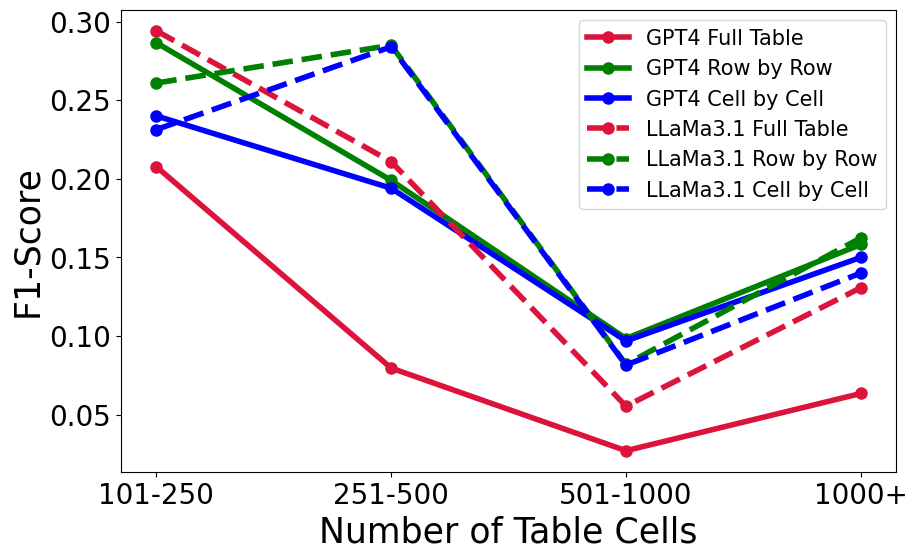

In [8]:
plt.figure(figsize=(10,6))

plt.plot(gpt4_ft_scores, label="GPT4 Full Table", color="crimson", linewidth=4, marker=".", markersize=16)
plt.plot(gpt4_rbr_scores, label="GPT4 Row by Row", color="green", linewidth=4, marker=".", markersize=16)
plt.plot(gpt4_cbc_scores, label="GPT4 Cell by Cell", color="blue", linewidth=4, marker=".", markersize=16)

plt.plot(llama_ft_scores, label="LLaMa3.1 Full Table", color="crimson", linewidth=4, linestyle="dashed", marker=".", markersize=16)
plt.plot(llama_rbr_scores, label="LLaMa3.1 Row by Row", color="green", linewidth=4, linestyle="dashed", marker=".", markersize=16)
plt.plot(llama_cbc_scores, label="LLaMa3.1 Cell by Cell", color="blue", linewidth=4, linestyle="dashed", marker=".", markersize=16)

plt.xlabel("Number of Table Cells", fontsize=25)
plt.ylabel("F1-Score", fontsize=25)
plt.xticks(np.arange(0, 4, step=1), labels=['101-250', '251-500', '501-1000', '1000+'])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(loc=1, prop={'size': 15})
plt.savefig("RES_CHARTS/prompting_wrt_table_size.pdf", format="pdf")
plt.show()